In [1]:
"""
CS353 - Machine Learning Lab
Lab1
Section 2
Name: Hardik L Harti
Roll number : 181CO220
Date : 09.02.2021
"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
#importing titanic dataset
df=pd.read_csv(r'C:\Users\hardi\Desktop\titanic.csv')

#data preprocessing
m = df['Age'].mean()
df['Age'] = df['Age'].replace(np.nan, round(m))
df['Embarked'] = df['Embarked'].replace(np.nan, 'Q')

#encoding string data
p_df = df.copy()
le = preprocessing.LabelEncoder()
p_df.Sex = le.fit_transform(p_df.Sex)
p_df.Embarked = le.fit_transform(p_df.Embarked)
p_df = p_df.drop(['Name','Ticket','Cabin'],axis=1)

X = p_df.drop(['Survived'], axis=1).values
y = p_df['Survived'].values

#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#actual data
df.head()
#df.groupby("Survived").size()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#preprocessed data
p_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [5]:
#Gaussian naive bayes model
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [6]:
#Calculating accuracy scores and reports for comparison
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, plot_confusion_matrix
print('Gaussian naive bayes algorithm')
print('Accuracy : ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('Report',classification_report(y_test, y_pred))

Gaussian naive bayes algorithm
Accuracy :  0.7982062780269058
Report               precision    recall  f1-score   support

           0       0.83      0.83      0.83       132
           1       0.76      0.75      0.75        91

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



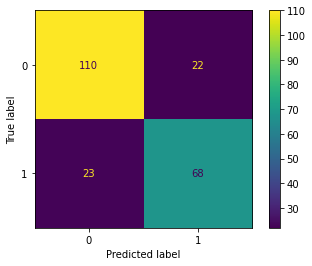

In [7]:
plot_confusion_matrix(gnb, X_test, y_test)